In [54]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [55]:
'pH'
#This is for pH model
datapH = pd.read_excel('Polymer_data.xlsx', sheet_name=0)

varpH = ['pH','PAM','HMTA','HQ','T']
X = datapH[varpH]
y = datapH['lnt, lab']
X2 = X[:78]
y2 = y[:78]
print(X)
print(y)

     pH  PAM  HMTA    HQ    T
0   8.0  1.0  0.30  0.20   85
1   8.0  1.0  0.30  0.20  100
2   8.0  1.0  0.30  0.20  110
3   8.0  1.0  0.30  0.20  120
4   8.5  1.0  0.30  0.20   85
..  ...  ...   ...   ...  ...
87  8.5  1.0  0.30  0.20  120
88  8.5  1.0  0.40  0.30  120
89  8.5  1.0  0.45  0.35  120
90  8.5  1.0  0.50  0.40  120
91  8.5  1.0  0.60  0.50  120

[92 rows x 5 columns]
0     4.941642
1     4.276666
2     2.708050
3     2.302585
4     5.010635
        ...   
87    2.296567
88    1.704748
89    1.602615
90    1.599993
91    1.597568
Name: lnt, lab, Length: 92, dtype: float64


In [56]:
train_X, test_X, train_y, test_y = train_test_split(X2, y2, random_state =0)

In [57]:
'kNN model'
knn = KNeighborsRegressor()
knn.fit(train_X, train_y)

KNeighborsRegressor()

In [58]:
pred_y = knn.predict(test_X)
knn_mae = mean_absolute_error(test_y,pred_y)
mean_y = np.mean(y)

In [59]:
test_yy = np.array(test_y)
print(knn.score(test_X, test_y), 'R-squared score') #Check in the xls excel to see the R-squared reported in the paper

0.805762015628767 R-squared score


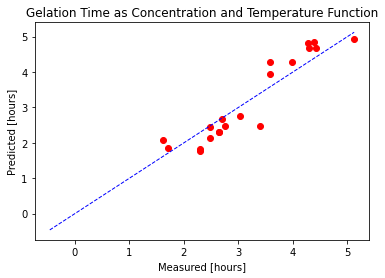

In [60]:
fig, ax = plt.subplots()
ax.scatter(test_y, pred_y, color = 'red')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'b--', lw=1)
ax.set_title('Gelation Time as Concentration and Temperature Function')
ax.set_xlabel('Measured [hours]')
ax.set_ylabel('Predicted [hours]')
plt.show()

'save csv file'
predKNN = knn.predict(X)

df = pd.DataFrame(predKNN)
df.to_csv('predKNN.csv', index=False)

In [61]:
'SALINITY'
#This if for Salinity model
datapH = pd.read_excel('Polymer_data.xlsx', sheet_name=1)
print(datapH.head())

varSal= ['Salinity','T (K)']
X = datapH[varSal]
y = datapH['ln t']

   Unnamed: 0      ln t   t (hours)  T (K)  Salinity    ln t.1
0           0  4.785086  119.711603    358       1.0  4.785086
1           1  4.868655  130.145782    358       1.5  4.868655
2           2  4.968939  143.874131    358       2.0  4.968939
3           3  5.102650  164.457193    358       2.5  5.102650
4           4  5.186220  178.791439    358       3.0  5.186220


In [62]:
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state =0)

In [63]:
'kNN model'
knn = KNeighborsRegressor()
knn.fit(train_X, train_y)

KNeighborsRegressor()

In [64]:
pred_y = knn.predict(test_X)
knn_mae = mean_absolute_error(test_y,pred_y)
mean_y = np.mean(y)
print(knn_mae)

0.28747968045623445


In [65]:
test_yy = np.array(test_y)
print(knn.score(test_X, test_y), 'R-squared score') #Check in the xls excel to see the R-squared reported in the paper

0.7709703970709275 R-squared score


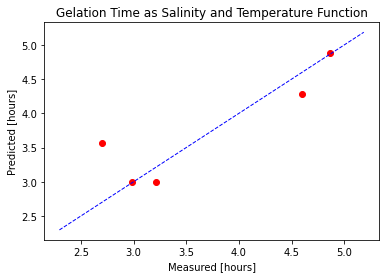

In [66]:
fig, ax = plt.subplots()
ax.scatter(test_y, pred_y, color = 'red')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'b--', lw=1)
ax.set_title('Gelation Time as Salinity and Temperature Function')
ax.set_xlabel('Measured [hours]')
ax.set_ylabel('Predicted [hours]')
plt.show()

yy_pred = knn.predict(X)

df = pd.DataFrame(yy_pred)
df.to_csv('predKNN_Sal.csv', index=False)